In [18]:
import gymnasium as gym
import Box2D
import pygame
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [19]:
import agent_class as agent

# Initialize environment and agent

In [20]:
# We first create the environment on which we will later train the agent
env = gym.make('LunarLander-v2')

# We need to know the dimensionality of the state space, as well as how many
# actions are possible
N_actions = env.action_space.n
observation, info = env.reset()
N_state = len(observation)

print('dimension of state space =',N_state)
print('number of actions =',N_actions)

dimension of state space = 8
number of actions = 4


In [23]:
# We create an instance of the agent class. 
# At initialization, we need to provide 
# - the dimensionality of the state space, as well as 
# - the number of possible actions

parameters = {'N_state':N_state, 'N_actions':N_actions}

my_agent = agent.dqn(parameters=parameters)
# to train via the actor-critic algorithm, use this line:
# my_agent = agent.actor_critic(parameters=parameters)

# Train agent

In [22]:
# We train the agent on the LunarLander-v2 environment.
# Setting verbose=True allows us to follow the progress of the training

training_results = my_agent.train(environment=env,
                                verbose=True)

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 20 episodes)  | (last 20 episodes) |
|-----------------------------------------------------------------------
|     100 |     -126.620    |       -268.554      |      -126.964      |
|     200 |      -98.862    |       -328.934      |      -122.698      |
|     300 |      -90.468    |       -165.032      |       -68.121      |
|     400 |      -48.439    |       -111.538      |       -44.456      |
|     500 |      221.184    |        -68.087      |        56.084      |
|     600 |      196.835    |        -58.510      |       129.535      |
|     700 |      -81.564    |        -93.454      |        97.728      |
|     800 |      186.523    |        -39.792      |       129.846      |
|     900 |      201.612    |         -7.895      |       179.000      |
|    1000 |      186.377    |         67.278      |       210.445      |
|    1100 |      225.298    |        -30.337      |

In [11]:
training_results = my_agent.train(environment=env,
                                verbose=True)

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 20 episodes)  | (last 20 episodes) |
|-----------------------------------------------------------------------
|     100 |      273.452    |        227.933      |       261.803      |


In [12]:
training_results = my_agent.train(environment=env,
                                verbose=True)

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 20 episodes)  | (last 20 episodes) |
|-----------------------------------------------------------------------
|      57 |      271.076    |        216.047      |       268.249      |


In [13]:
print(env)

<TimeLimit<OrderEnforcing<PassiveEnvChecker<LunarLander<LunarLander-v2>>>>>


In [7]:
# the method my_agent.train() from the previous cell returns a dictionary
# with training stats, namely:
# - duration of each episode during training,
# - return of each episode during training
# - the total number of training epochs at the end of each episode
# - the total number of steps simulated at the end of each episode

training_results.keys()

dict_keys(['episode_durations', 'epsiode_returns', 'n_training_epochs', 'n_steps_simulated', 'training_completed'])

# Plot training stats

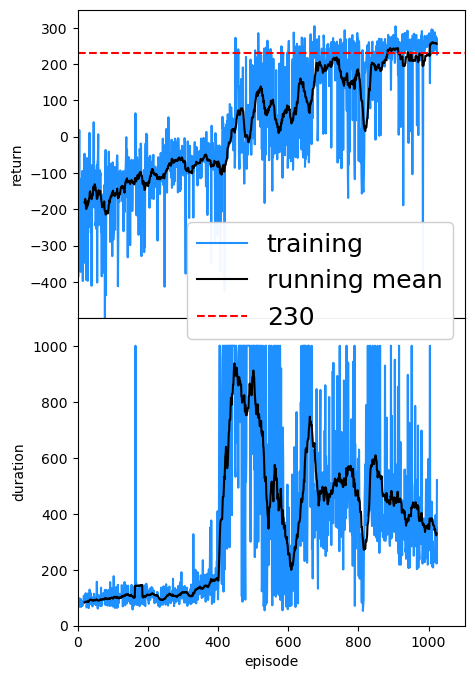

In [9]:
# Plot both the return per episode and the duration per episode during
# training, together with their running average over 20 consecutive episodes

N = 20 # number of episodes for running average

def running_mean(x,N=20):
        x_out = np.zeros(len(x)-N,dtype=float)
        for i in range(len(x)-N):
                x_out[i] = np.mean(x[i:i+N+1])
        return x_out
        
def plot_returns_and_durations(training_results,filename=None):
    fig,axes = plt.subplots(2,1,figsize=(5,8))
    fig.subplots_adjust(hspace=0.0001)
    #
    # return as a function of episode
    ax = axes[0]
    x = training_results['epsiode_returns']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(230,ls='--',
               label='230',
                        color='red')
    #
    ax.set_ylim(-499,350)
    ax.set_xticks([])
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'return')
    #
    #
    ax = axes[1]
    x = training_results['episode_durations']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(1200,ls='--', # draw line outside of plot scale, 
                label='230', # to get the red dotted line into the legend
                        color='red')
    #
    ax.set_ylim(0,1100)
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'duration')
    ax.legend(loc='upper right',bbox_to_anchor=(1.,1.35),
                                framealpha=0.95,
                        fontsize=18)
    #
    plt.show()
    if filename != None:
        fig.savefig(filename,bbox_inches='tight')
    plt.close(fig)

plot_returns_and_durations(training_results=training_results)

# Create gameplay video using trained agent

First we create a "live" video that pops up and shows Lunar Lander gameplay performed by the agent

In [10]:
# There is the issue that the game window freezes when running gym games 
# in jupyter notebooks, see https://github.com/openai/gym/issues/2433
# We here use the fix from that website, which is to use the following
# wrapper class:
class PyGameWrapper(gym.Wrapper):
    def render(self, **kwargs):
        retval = self.env.render( **kwargs)
        for event in pygame.event.get():
            pass
        return retval

In [11]:
# Create a wrapped environment
env = PyGameWrapper(gym.make('LunarLander-v2',render_mode='human'))

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        #env.render()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break
    
env.close()

Run 1: duration = 195, total return = 273.849
Run 2: duration = 237, total return = 270.763
Run 3: duration = 208, total return = 252.146
Run 4: duration = 207, total return = 261.787
Run 5: duration = 219, total return = 250.854
Run 6: duration = 251, total return = 284.468
Run 7: duration = 254, total return = 287.262
Run 8: duration = 225, total return = 273.952
Run 9: duration = 239, total return = 253.324
Run 10: duration = 206, total return = 255.230
Run 11: duration = 211, total return = 261.986
Run 12: duration = 204, total return = 300.147
Run 13: duration = 1000, total return = 161.461
Run 14: duration = 274, total return = 294.781
Run 15: duration = 268, total return = 282.087
Run 16: duration = 272, total return = 298.789
Run 17: duration = 262, total return = 292.903
Run 18: duration = 228, total return = 273.914
Run 19: duration = 196, total return = 273.469
Run 20: duration = 242, total return = 276.429


We also create a video file containing 20 games played by the agent

In [13]:
from gymnasium.wrappers.monitoring import video_recorder

env = gym.make('LunarLander-v2', render_mode="rgb_array")
video = video_recorder.VideoRecorder(env, './video.mp4'.format())

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        video.capture_frame()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break

video.close()
env.close()

Run 1: duration = 249, total return = 291.963
Run 2: duration = 254, total return = 278.824
Run 3: duration = 201, total return = 247.601
Run 4: duration = 275, total return = 289.625
Run 5: duration = 212, total return = 252.505
Run 6: duration = 206, total return = 241.566
Run 7: duration = 209, total return = 281.196
Run 8: duration = 231, total return = 269.008
Run 9: duration = 212, total return = 271.386
Run 10: duration = 228, total return = 262.895
Run 11: duration = 275, total return = 302.676
Run 12: duration = 1000, total return = 159.700
Run 13: duration = 209, total return = 291.849
Run 14: duration = 253, total return = 287.902
Run 15: duration = 203, total return = 252.533
Run 16: duration = 263, total return = 296.660
Run 17: duration = 235, total return = 263.450
Run 18: duration = 276, total return = 284.159
Run 19: duration = 253, total return = 281.744
Run 20: duration = 259, total return = 288.279
Moviepy - Building video ./video.mp4.
Moviepy - Writing video ./vide

TypeError: must be real number, not NoneType